# Visualization With Seaborn

In [1]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading dataset

In [4]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')

# drop the null values
data_BM = data_BM.dropna(how="any")

# multiply Item Visibility by 100 to increase size
data_BM["Visibility_Scaled"] = data_BM["Item_Visibility"] * 100

# View the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Visibility_Scaled
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1.604730
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1.927822
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1.676007
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.000000
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,0.000000


## 1. Creating basic plots

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>

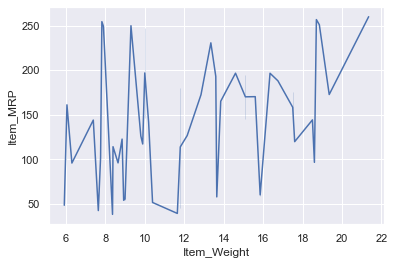

In [5]:
# line plit using lineplot()
sns.lineplot(x="Item_Weight", y="Item_MRP", data=data_BM[:50])

<AxesSubplot:xlabel='Item_Type', ylabel='Item_MRP'>

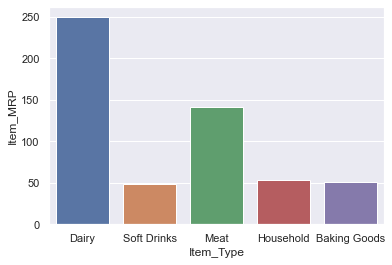

In [6]:
# bar chart
sns.barplot(x="Item_Type", y="Item_MRP", data=data_BM[:5])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

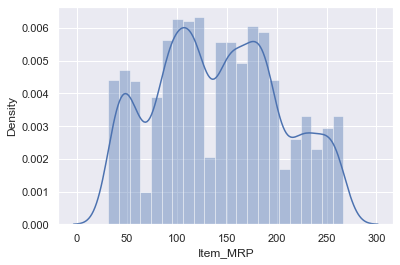

In [8]:
# histogram
sns.distplot(data_BM['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

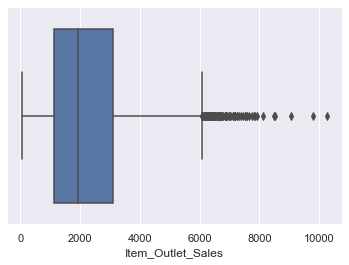

In [16]:
# boxplot
sns.boxplot(data_BM['Item_Outlet_Sales'], orient='vertical')
#this should be vertical? change orient to horizontal and it should be like what is shown

<AxesSubplot:xlabel='Item_Outlet_Sales'>

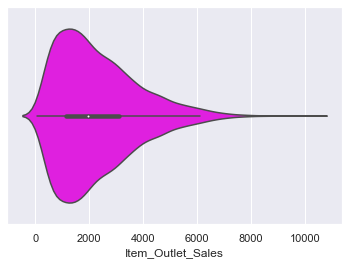

In [20]:
# violin plot
sns.violinplot(data_BM['Item_Outlet_Sales'], orient='vertical', color ='magenta')

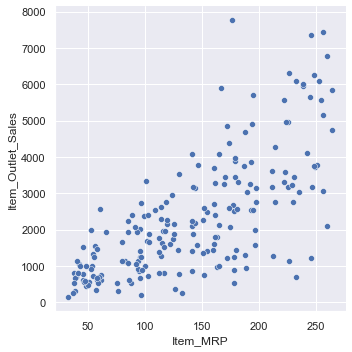

In [19]:
# scatter plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter");

### Hue semantic

Adds another dimension to the plot by coloring the points according to a 3rd variable.

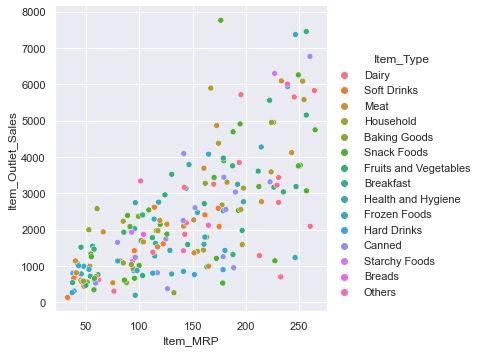

In [21]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", hue="Item_Type", data=data_BM[:200]);

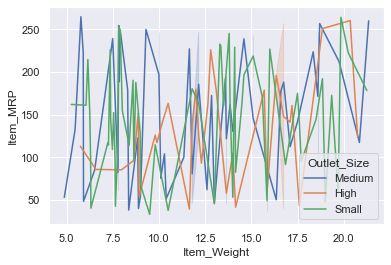

In [22]:
# line plot using hue semantic
sns.lineplot(x="Item_Weight", y="Item_MRP", hue='Outlet_Size', data=data_BM[:150]);

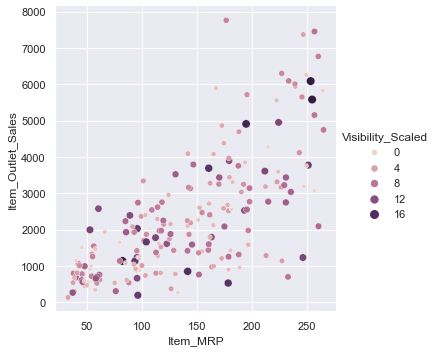

In [23]:
# bubble plot
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=data_BM[:200], kind="scatter", size="Visibility_Scaled", hue="Visibility_Scaled")

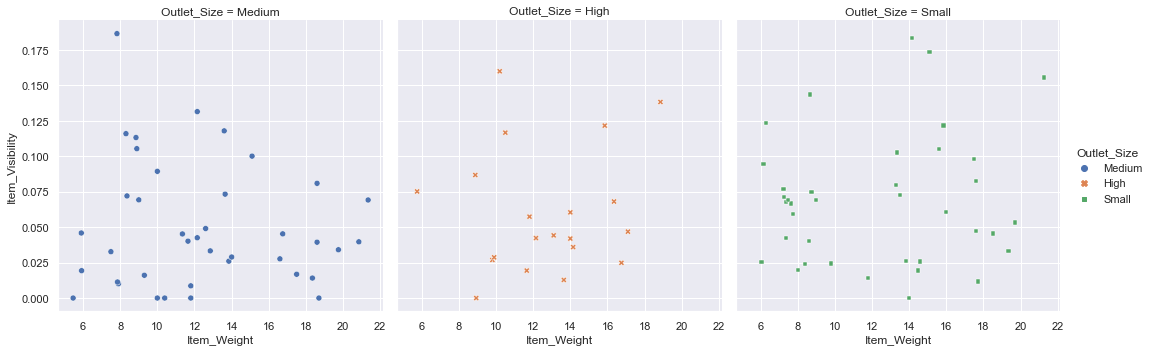

In [24]:
# category wise scatter plot
sns.relplot(x="Item_Weight", y="Item_Visibility", hue="Outlet_Size", style="Outlet_Size", col="Outlet_Size", data=data_BM[:100])

## 2. Advance categorical plots in seaborn

3 categorical variables in seaborn

- cateogrical scatterplots:
    - stripplot() (with kind="strip": the default)
    - swarmplot() (with kind="swarm")
- Categorical distribution plots:
    -  boxplot() (with kind="box")
    - violinplot() (with kind="violin")
- Categorical estimate plots:
    - barplot() (with kind="bar")

### a. Categorical scatterplots

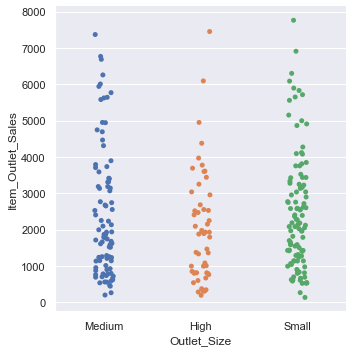

In [29]:
# strip plot
# draws a sctterplot where one variable is categorical, other is continous
# create this by passing kind=strip in the catplot()

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='strip',data=data_BM[:250]);

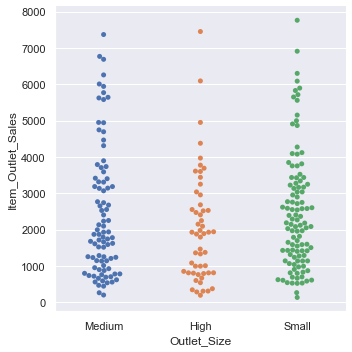

In [30]:
# swarmplot
# simialr to stripplot() but points are adjusted (only along the categorical axis) so they don't overlap

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='swarm' ,data=data_BM[:250]);

### Categorical distribution plots

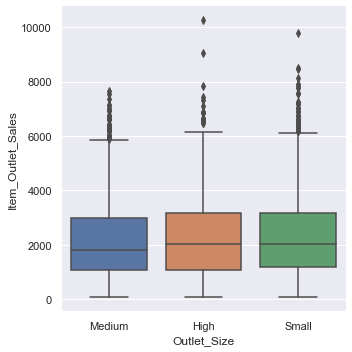

In [31]:
# boxplot

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='box' ,data=data_BM)

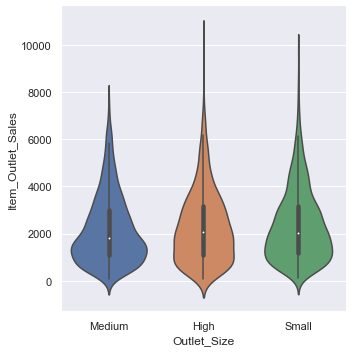

In [33]:
# violin plot
sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='violin' ,data=data_BM)

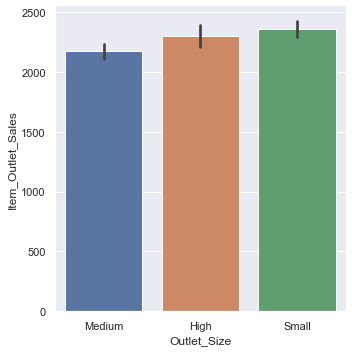

In [34]:
# barplot

sns.catplot(x="Outlet_Size", y="Item_Outlet_Sales", kind='bar' ,data=data_BM)

## 3. Density plots

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

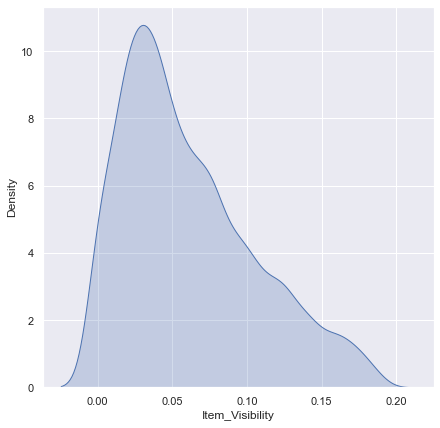

In [35]:
# distribution of Item Visibility
plt.figure(figsize=(7,7))
sns.kdeplot(data_BM['Item_Visibility'], shade=True)

# rather then histogram this plot uses a kernel density estimation which seaborn does with sns.kdeplot

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

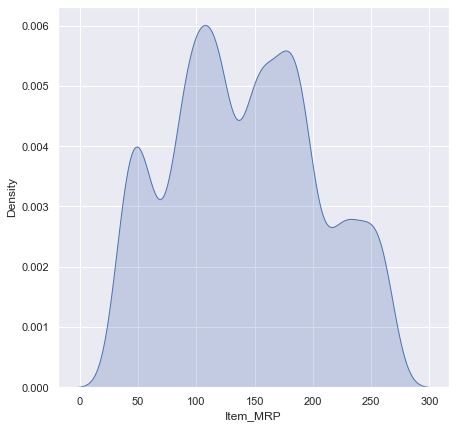

In [36]:
# distribution of Item MRP
plt.figure(figsize=(7,7))
sns.kdeplot(data_BM['Item_MRP'], shade=True)

### Histogram and Density Plot

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

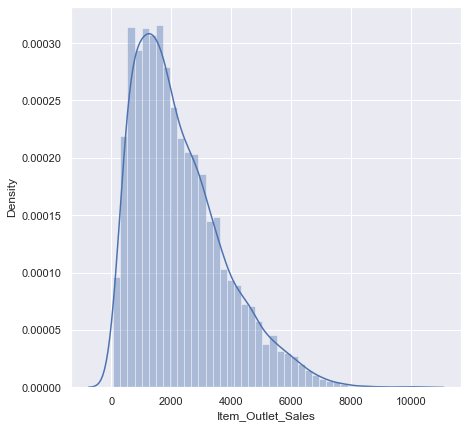

In [38]:
# histograms and KDE can be comnined using distplot
plt.figure(figsize=(7,7))
sns.distplot(data_BM['Item_Outlet_Sales'])

## Pair plots

Are usefeul when exploring correlations between multidimensional data, when you like to plot all pairs of value against each other


In [39]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


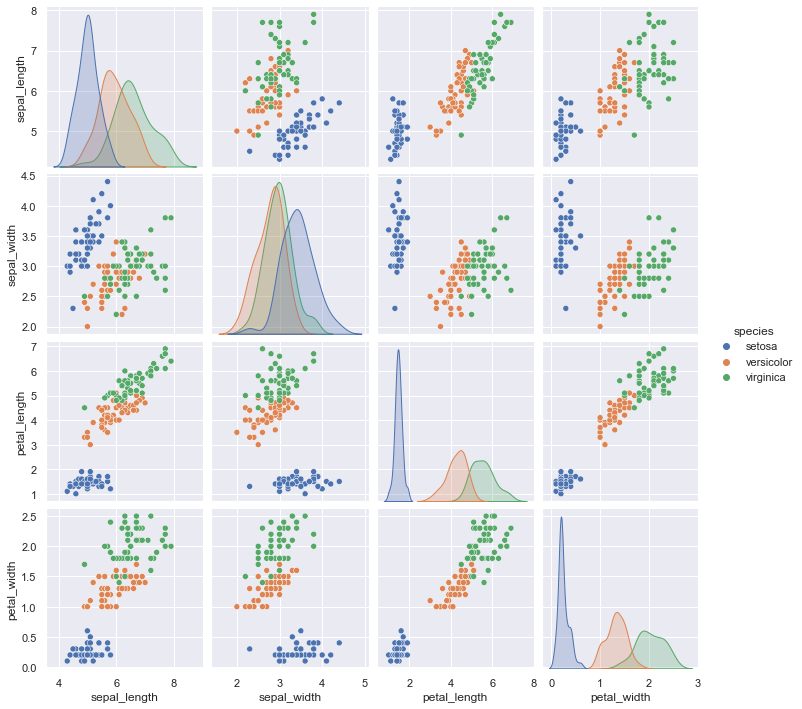

In [40]:
sns.pairplot(iris, hue='species', height=2.5)